# Project: Wrangling and Analyze Data

In [1]:
#import all needed libraries 
import pandas as pd
import numpy as np
import requests as req
import tweepy 
import json as js
import io
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = req.get(url)
image_predictions = pd.read_csv(io.StringIO(response.text), sep='\t')   
image_predictions.to_csv('image-predictions.tsv',sep='\t',index=False)
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Download JSON file (tweet_json.txt)

In [4]:
#Using the Tweepy library to query data via Twitter API:

CONSUMER_KEY = "CONSUMER_KEY"
CONSUMER_SECRET = "CONSUMER_SECRET"
ACCESS_TOKEN = "ACCESS_TOKEN"
ACCESS_TOKEN_SECRET = "ACCESS_TOKEN_SECRET"

# Create an OAuthHandler instance

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [5]:
#Downloading JSON file (tweet_json.txt):
full_tweet_data = pd.read_json('tweet-json.txt', lines=True)
full_tweet_data.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



<h3> twitter_archive Dataset Assessment</h3> 

#starting with twitter_archive dataset
twitter_archive.info()

In [6]:
#finding dataframe shape
twitter_archive.shape

(2356, 17)

In [7]:
#check columns info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
#finding summary statistics 
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
#including object columns in the summary
twitter_archive.describe(include = ['O'])

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2015-12-15 01:32:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Calbert. He doesn't have enough l...,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/837820167...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [10]:
#checking column values
twitter_archive.doggo.value_counts()
#we have None values which is = null

None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
#checking column values
twitter_archive.floofer.value_counts()
#we have None values which is = null

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
#checking column values
twitter_archive.pupper.value_counts()
#we have None values which is = null

None      2099
pupper     257
Name: pupper, dtype: int64

In [13]:
#checking column values
twitter_archive.puppo.value_counts()
#we have None values which is = null

None     2326
puppo      30
Name: puppo, dtype: int64

In [14]:
#checking column values
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
#checking column values
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Ralf          1
Steve         1
Wesley        1
Godi          1
Sunshine      1
Name: name, Length: 957, dtype: int64

In [16]:
#finding if there are any duplicated values
twitter_archive.duplicated().sum()

0

In [17]:
#find if there are any null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

<h3> image_predictions Dataset Assessment</h3> 

In [18]:
#finding dataframe shape
image_predictions.shape

(2075, 12)

In [19]:
#finding dataframe info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
#finding summary statistics for all columns
image_predictions.describe(include = 'all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [21]:
#finding unique values
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [22]:
#find if there are any null values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
#checking column values
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
# Check if there are any predictions with confidence greater than 100% or less than 0% (negative)

image_predictions[(image_predictions.p1_conf > 1) | (image_predictions.p1_conf < 0)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
# Check if there are any predictions with confidence greater than 100% or less than 0% (negative)

image_predictions[(image_predictions.p2_conf > 1) | (image_predictions.p2_conf < 0)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [26]:
# Check if there are any predictions with confidence greater than 100% or less than 0% (negative)

image_predictions[(image_predictions.p3_conf > 1) | (image_predictions.p3_conf < 0)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [27]:
#checking column values
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [28]:
#checking column values
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [29]:
#checking column values
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

<h3> full_tweet_data Dataset Assessment</h3> 

In [30]:
#finding dataframe shape
full_tweet_data.shape

(2354, 31)

In [31]:
#finding dataframe info
full_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [32]:
#check summary stats using describe for all clolumns
full_tweet_data.describe(include = 'all')

<ipython-input-32-6c1802b7eb2f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  full_tweet_data.describe(include = 'all')


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
count,2354,2.354000e+03,2.354000e+03,2354,2354,2354,2354,2073,2354,7.800000e+01,...,2354.000000,2354,2354,2211.0,2211.0,2354,179,2.900000e+01,2.900000e+01,28
unique,2354,NaN,NaN,2354,1,143,2253,2073,4,NaN,...,NaN,2,1,NaN,NaN,9,179,NaN,NaN,28
top,2016-09-12 15:10:21+00:00,NaN,NaN,Say hello to Calbert. He doesn't have enough l...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 680081458753605632, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,False,False,NaN,NaN,en,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,NaN,NaN,{'created_at': 'Thu Jul 13 15:12:47 +0000 2017...
freq,1,NaN,NaN,1,2354,260,75,1,2219,NaN,...,NaN,2346,2354,NaN,NaN,2336,1,NaN,NaN,1
first,2015-11-15 22:32:08+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-08-01 16:23:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.426978e+17,7.426978e+17,NaN,NaN,NaN,NaN,NaN,NaN,7.455079e+17,...,8080.968564,NaN,NaN,0.0,0.0,NaN,NaN,8.162686e+17,8.162686e+17,NaN
std,NaN,6.852812e+16,6.852812e+16,NaN,NaN,NaN,NaN,NaN,NaN,7.582492e+16,...,11814.771334,NaN,NaN,0.0,0.0,NaN,NaN,6.164161e+16,6.164161e+16,NaN
min,NaN,6.660209e+17,6.660209e+17,NaN,NaN,NaN,NaN,NaN,NaN,6.658147e+17,...,0.000000,NaN,NaN,0.0,0.0,NaN,NaN,6.721083e+17,6.721083e+17,NaN
25%,NaN,6.783975e+17,6.783975e+17,NaN,NaN,NaN,NaN,NaN,NaN,6.757419e+17,...,1415.000000,NaN,NaN,0.0,0.0,NaN,NaN,7.888183e+17,7.888183e+17,NaN


In [33]:
#find if there are any null values
full_tweet_data.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [34]:
#checking column values
full_tweet_data.created_at.value_counts()

2016-09-12 15:10:21+00:00    1
2016-01-01 05:00:24+00:00    1
2016-06-25 19:42:08+00:00    1
2016-01-08 03:50:03+00:00    1
2017-01-31 01:27:39+00:00    1
                            ..
2016-02-08 17:58:03+00:00    1
2015-11-26 01:11:28+00:00    1
2016-06-13 21:16:49+00:00    1
2016-11-14 01:18:12+00:00    1
2017-01-10 01:15:10+00:00    1
Name: created_at, Length: 2354, dtype: int64

In [35]:
#checking column values
full_tweet_data.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [36]:
#checking column values
full_tweet_data.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

### Quality issues

#### twitter_archive
1. timestamp data type (convert to datetime)
2. tweet_id data type (convert to string)
3. Remove retweets and replies data  
3. Remove records where name = none or a  

#### image_predictions

1. Update data type (tweet_id should be string)

#### full_tweet_data

1. Update column name (id should be renamed as tweet_id)

2. id data type (convert to string)
3. source data type (convert to category)
4. extract the exact source of tweet 

### Tidiness issues
1. Merging the 3 datasets for better analysis
 
2. Adding new categorical variable to combine doggo, floofer, pupper, puppo in a single column called "stages_of_dogs" (in twitter_archive)

3. Select only needed columns 



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [37]:
# Make copies of original pieces of data

#Create a copy of twitter_archive dataframe
twitter_archive_copy = twitter_archive.copy()

#Create a copy of image_predictions dataframe
image_predictions_copy = image_predictions.copy()

#Create a copy of full_tweet_data dataframe
full_tweet_data_copy = full_tweet_data.copy()

## Cleaning Data : Quality Issues

### Issue #1&2: Data Types in twitter_archive_copy

#### Define: timestamp data type (convert to datetime) & tweet_id data type (convert to string)

#### Code

In [38]:
#update tweet_id type to string
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

#update timestamp type to dateTime
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy['timestamp']).dt.date.astype('datetime64[ns]')

#### Test

In [39]:
#print data types of both columns after updates
print (twitter_archive_copy['tweet_id'].dtypes, twitter_archive_copy['timestamp'].dtypes)

object datetime64[ns]


In [40]:
#print 1 record to check data values after updates
twitter_archive_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Issue #3: Drop retweets and replies data from twitter_archive_copy

#### Define:  Remove retweets and replies data from twitter_archive_copy since we don't need them

#### Code

In [41]:
#drop extra data of retweets & replies + extra columns
columns_tobe_dropped = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id',
                        'retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator']
twitter_archive_copy.drop(columns_tobe_dropped, axis=1,inplace = True)

#### Test

In [42]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tweet_id   2356 non-null   object        
 1   timestamp  2356 non-null   datetime64[ns]
 2   text       2356 non-null   object        
 3   name       2356 non-null   object        
 4   doggo      2356 non-null   object        
 5   floofer    2356 non-null   object        
 6   pupper     2356 non-null   object        
 7   puppo      2356 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 147.4+ KB


### Issue #4: Remove wrong values from twitter_archive_copy

#### Define:  Drop records where "name = a" from twitter_archive_copy since they seem to be typos

#### Code

In [43]:
# getting the index of rows where name = a
drop_list = twitter_archive_copy.index[twitter_archive_copy['name'] == 'a'].tolist()

In [44]:
#check shape before drop
twitter_archive_copy.shape

(2356, 8)

In [45]:
#drop the list
twitter_archive_copy.drop(drop_list, inplace=True) 

#### Test

In [46]:
#check shape after drop
twitter_archive_copy.shape

(2301, 8)

### Issue #5: Data type updates in image_predictions_copy

#### Define: Update data type of tweet_id to be string

#### Code

In [47]:
#change data type to string
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype(str)

#### Test

In [48]:
#print data type of tweet_id
print (image_predictions_copy['tweet_id'].dtypes)

object


### Issue #6: Rename id column in full_tweet_data_copy

#### Define: Update column name "id"  as "tweet_id"

#### Code

In [49]:
#rename id to tweet_id
full_tweet_data_copy.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [50]:
#get columns names
full_tweet_data_copy.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

### Issue #7&8: Data type update in full_tweet_data_copy

#### Define: Update data type of tweet_id to be string and source data type to be category

#### Code

In [51]:
#update tweet_id data type to string
full_tweet_data_copy['tweet_id'] = full_tweet_data_copy['tweet_id'].astype(str)

#update source data type to category
full_tweet_data_copy['source'] = full_tweet_data_copy['source'].astype('category')

#### Test

In [52]:
#print data type of tweet_id
print (full_tweet_data_copy['tweet_id'].dtypes, full_tweet_data_copy['source'].dtypes)

object category


### Issue 9: Extracting needed data

#### Define: extract the exact source of tweet from source column

#### Code

In [53]:
full_tweet_data_copy.source = full_tweet_data_copy.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

#### Test

In [54]:
full_tweet_data_copy.source.value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Cleaning Data : Tidiness Issues

### Issue #1: Merging the 3 dataframes

#### Define: merge full_tweet_data_copy, image_predictions_copy, and twitter_archive_copy using tweet_id for better analysis

#### Code

In [55]:
# Merge the 3 dataframes based on the tweet_id column:
full_tweets = pd.merge(twitter_archive_copy, image_predictions_copy, how = 'inner', on = ['tweet_id'] )
full_tweets = pd.merge(full_tweets, full_tweet_data_copy, how = 'inner', on = ['tweet_id'])
full_tweets.head(3)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,jpg_url,img_num,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Test

In [56]:
full_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2017
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2018 non-null   object             
 1   timestamp                      2018 non-null   datetime64[ns]     
 2   text                           2018 non-null   object             
 3   name                           2018 non-null   object             
 4   doggo                          2018 non-null   object             
 5   floofer                        2018 non-null   object             
 6   pupper                         2018 non-null   object             
 7   puppo                          2018 non-null   object             
 8   jpg_url                        2018 non-null   object             
 9   img_num                        2018 non-null   int64              
 10  p1                      

### Issue #2: Create new column in the dataframe

#### Define: Adding new categorical variable to combine doggo, floofer, pupper, puppo in a single column called "stages_of_dogs" 

#### Code

In [57]:
#replace none with space ' '
full_tweets.doggo.replace('None', '', inplace=True)
full_tweets.floofer.replace('None', '', inplace=True)
full_tweets.pupper.replace('None', '', inplace=True)
full_tweets.puppo.replace('None', '', inplace=True)

# merge into 1 column
full_tweets['stages_of_dogs'] = full_tweets.doggo + full_tweets.floofer + full_tweets.pupper + full_tweets.puppo

# handle multiple stages
full_tweets.loc[full_tweets.stages_of_dogs == 'doggopupper', 'stages_of_dogs'] = 'doggo, pupper'
full_tweets.loc[full_tweets.stages_of_dogs == 'doggopuppo', 'stages_of_dogs'] = 'doggo, puppo'
full_tweets.loc[full_tweets.stages_of_dogs == 'doggofloofer', 'stages_of_dogs'] = 'doggo, floofer'

# fill missing values with name of column
full_tweets.loc[full_tweets.stages_of_dogs == '', 'stages_of_dogs'] = np.nan

#### Test

In [58]:
full_tweets['stages_of_dogs'].value_counts()

pupper            206
doggo              67
puppo              23
doggo, pupper      11
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: stages_of_dogs, dtype: int64

In [59]:
#Drop the columns 
full_tweets.drop(columns=['doggo','floofer','pupper','puppo'])

,tweet_id,timestamp,text,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,stages_of_dogs
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,666063827256086533,2015-11-16,This is the happiest dog you will ever see. Ve...,the,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2014,666058600524156928,2015-11-16,Here is the Rand Paul of retrievers folks! He'...,the,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2015,666051853826850816,2015-11-16,This is an odd dog. Hard on the outside but lo...,an,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2016,666049248165822465,2015-11-16,Here we have a 1949 1st generation vulpix. Enj...,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


### Issue #3: Selecting only needed features

#### Define: selecting only needed features to be included in the final dataframe

#### Code

In [60]:
#selecting only needed features
final_tweets_data = full_tweets[['tweet_id','created_at','retweet_count','favorite_count', 'stages_of_dogs', 'source']]

#### Test

In [61]:
final_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2017
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2018 non-null   object             
 1   created_at      2018 non-null   datetime64[ns, UTC]
 2   retweet_count   2018 non-null   int64              
 3   favorite_count  2018 non-null   int64              
 4   stages_of_dogs  316 non-null    object             
 5   source          2018 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 110.4+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
final_tweets_data.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. The highest number of Tweets was in 2016

2. The relationship between favorite_acounts and retweet_acounts is positive 

3. The most common stage of doges is pupper with 65.89% 
4. The most used source to tweet is iphone

### Visualization

In [71]:
#for insight 1, finding count of tweets per year:
data= final_tweets_data['tweet_id'].groupby( final_tweets_data.created_at.dt.year).count()
data.head()

created_at
2015    623
2016    960
2017    356
Name: tweet_id, dtype: int64

Text(0, 0.5, 'Total number of Tweets')

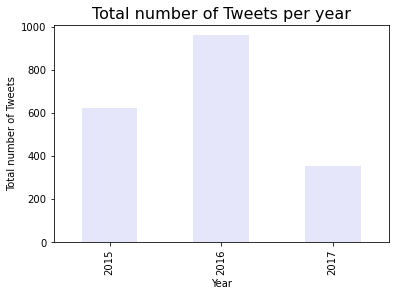

In [72]:
#ploting a bar chart 
data.plot.bar(color='Lavender')
plt.title('Total number of Tweets per year', size=16)
plt.xlabel('Year')
plt.ylabel('Total number of Tweets')

In [64]:
#for insight 2, checking favorite_acounts and retweet_acounts statistics:
final_tweets_data.describe()

,retweet_count,favorite_count
count,2018.000000,2018.000000
mean,3028.937066,8708.240337
std,5098.711145,12171.987523
min,16.000000,0.000000
25%,661.000000,1784.250000
50%,1448.000000,3972.500000
75%,3517.500000,11181.500000
max,79515.000000,132810.000000


In [65]:
#removing favorite_count = 0 for better visulization:
final_tweets_data=final_tweets_data[final_tweets_data['favorite_count']!= 0]

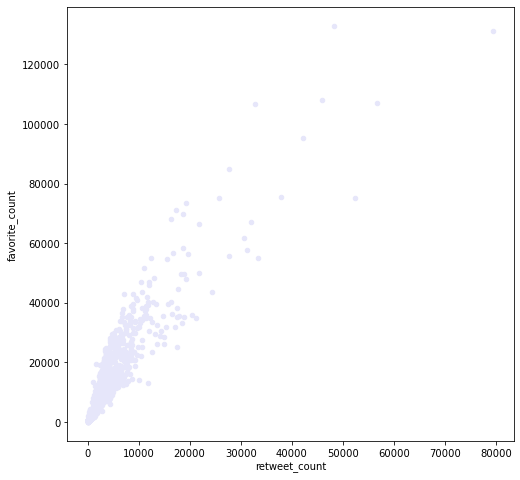

In [74]:
#finding the relationship between favorite_acounts and retweet_acounts in scatter plot:
final_tweets_data.plot(x='retweet_count',y='favorite_count',kind='scatter',figsize=(8,8), color='Lavender');

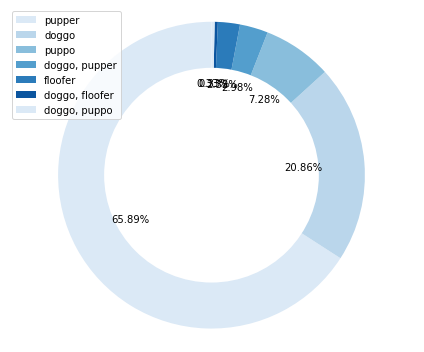

In [67]:
#for insight 3, plotting a dounghts chart to find the most common stage of doges:

#define data
data = final_tweets_data.stages_of_dogs.value_counts()
labels = ['pupper', 'doggo', 'puppo', 'doggo, pupper','floofer', 'doggo, floofer', 'doggo, puppo']

#define Seaborn color palette to use
colors = sns.color_palette("Blues")[0:7]

fig1, ax1 = plt.subplots(figsize=(6, 5))


#create pie chart
ax1.pie(data, colors = colors, autopct='%.2f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels)
plt.show()

<AxesSubplot:title={'center':'Sources of Tweets'}, xlabel='source', ylabel='count'>

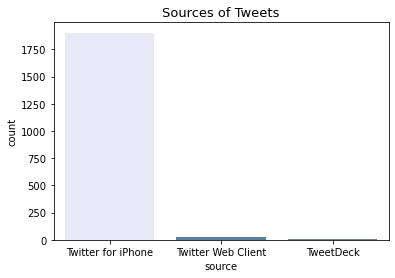

In [69]:
#for insight 4, plotting a bar chart to show the most used source to tweet by users:
plt.title('Sources of Tweets', size=13)
sns.countplot(data=final_tweets_data, x='source', palette=['Lavender',"steelblue", 'slategrey'])